# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [92]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
from itertools import product

# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(d, n, S_n):
    # S_n = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
    for y in product((0, 1), repeat=n):
        if sum(y) == 0 or sum(y) == n:
            continue
        clf = SVC(C=10000, shrinking=False, kernel="linear", tol=1e-5)
        clf.fit(S_n, y)
        if accuracy_score(clf.predict(S_n), y) < 1:
            return False
    return True

### c)

In [93]:
d, n = 2, 4
S_n = np.array([[-1, -1], [1, 1], [1, -1], [-1, 1]])
print(is_shattered(d, n, S_n))

False


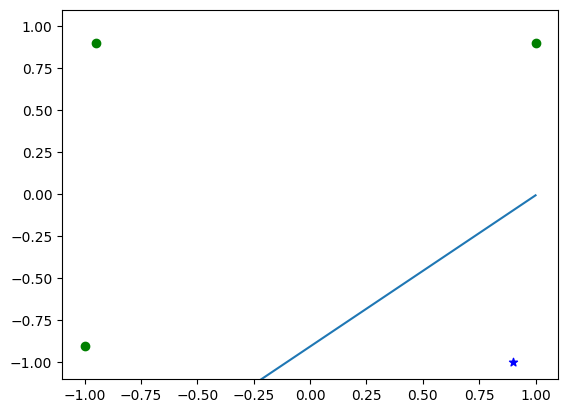

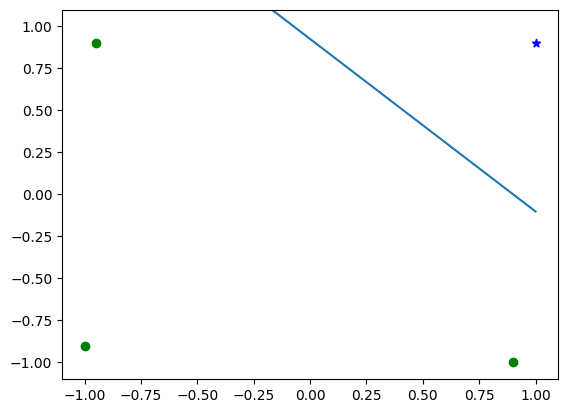

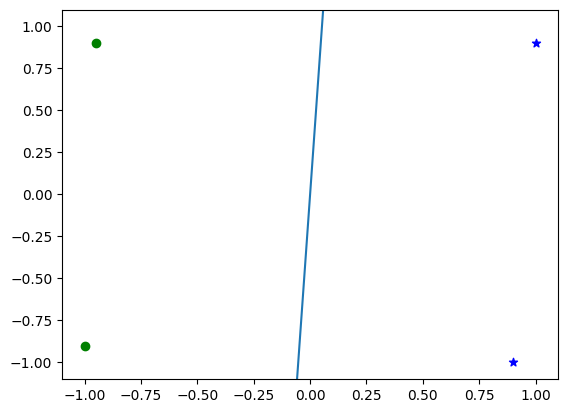

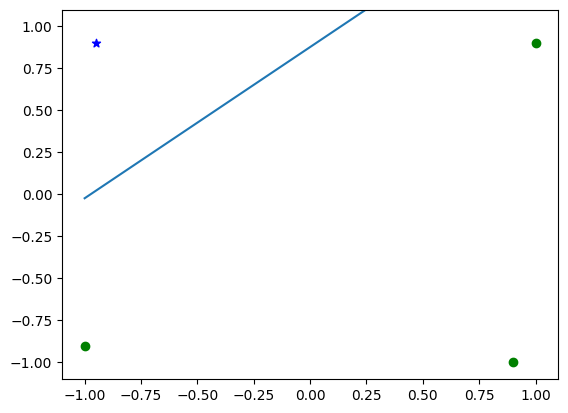

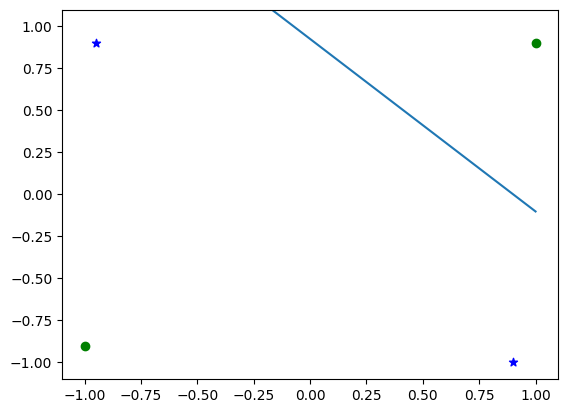

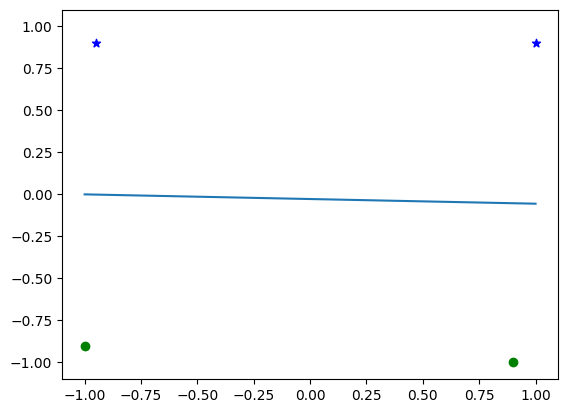

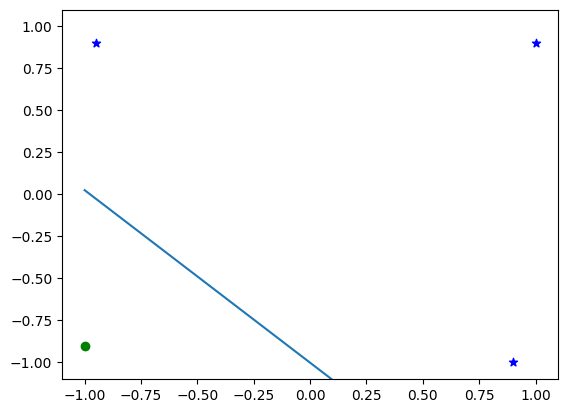

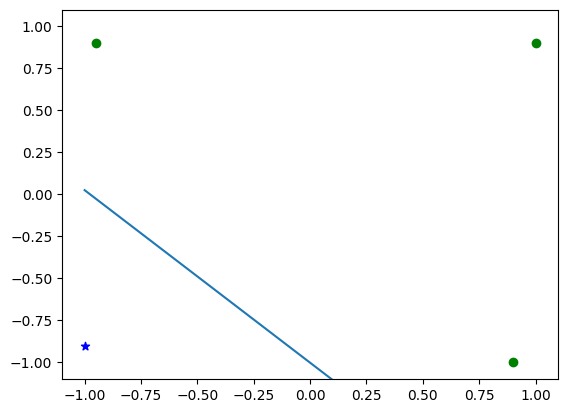

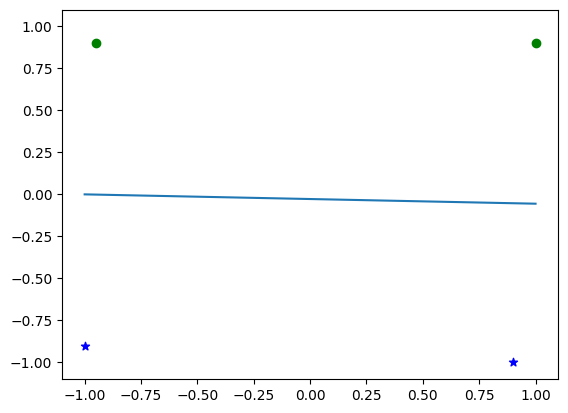

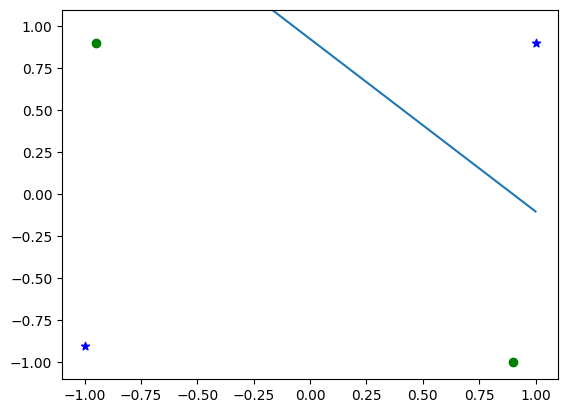

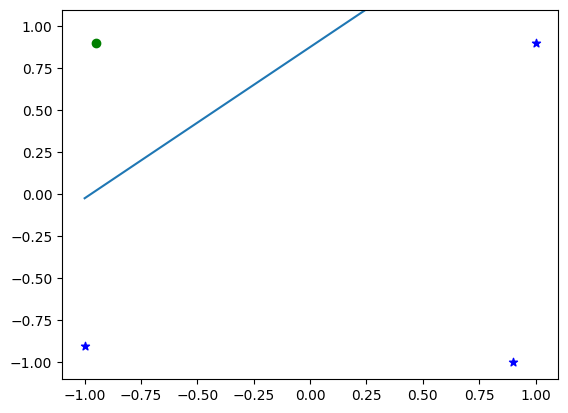

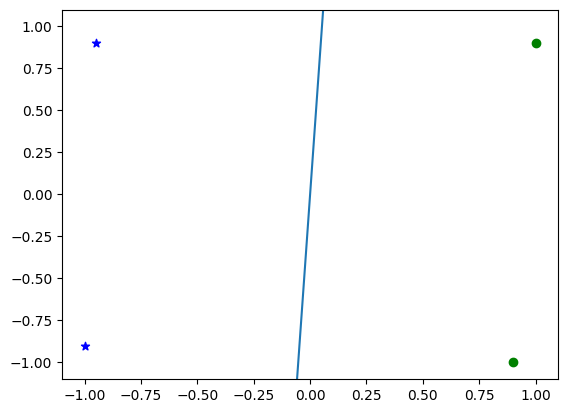

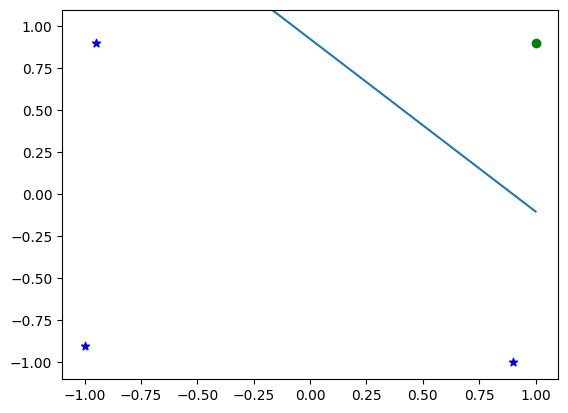

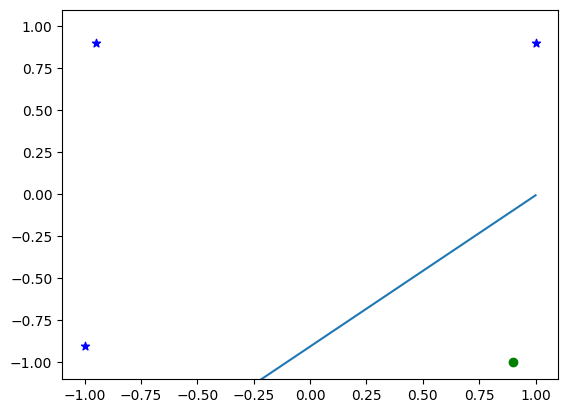

In [94]:
import matplotlib.pyplot as plt

d, n = 2, 4
S_n = np.array([[-1, -0.9], [-0.95, 0.9], [1, 0.9], [0.9, -1]])
x_linspace = np.linspace(-1, 1, num=500)
markers = ['o', '*']
colors = ["green", "blue"]
for y in product((0, 1), repeat=n):
    if sum(y) == 0 or sum(y) == n:
        continue
    clf = SVC(C=10000, shrinking=False, kernel="linear", tol=1e-5)
    clf.fit(S_n, y)
    for i, x in enumerate(S_n):
        plt.scatter(x[0], x[1], c=colors[y[i]], marker=markers[y[i]])
    w = clf.coef_[0]
    b = clf.intercept_[0]
    plt.plot(x_linspace, -(w[0] / w[1]) * x_linspace - b / w[1])
    ax = plt.gca()
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    plt.show()

In [95]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

### d)

In [96]:
# code

d_list = list(range(2, 11))
results = []

for d in d_list:
    for n in range(2, 20):
        flag = True
        for _ in range(50):
            S_n = np.random.normal(0, 1, (n, d))
            if is_shattered(d, n, S_n):
                flag = False
                break
        if flag:
            results.append(n)
            break

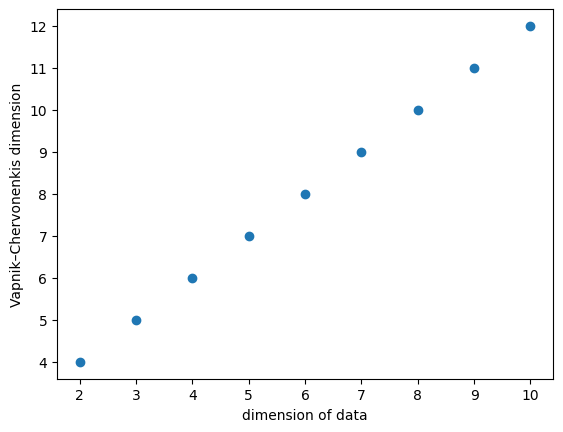

In [97]:
plt.scatter(d_list, results)
plt.xlabel("dimension of data")
plt.ylabel("Vapnik–Chervonenkis dimension")
plt.show()

### e)

In [98]:
# A hint: change a kernel in SVM